In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


In [74]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [75]:
df=pd.read_csv('../input/drug-classification/drug200.csv')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


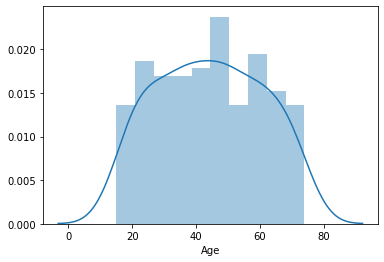

In [77]:
sns.distplot(df.Age,bins=10)

MAXIMUM PEOPLE LIE BETWEEN THE AGE OF 18 TO 70

In [78]:
df.Sex.unique()

array(['F', 'M'], dtype=object)

In [79]:
df.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [80]:
df.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [81]:
df.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

UNIVARIATE ANALYSIS


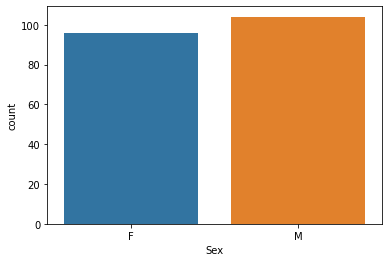

In [82]:
sns.countplot(df.Sex)

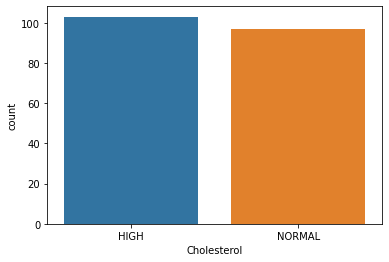

In [83]:
sns.countplot(df.Cholesterol)

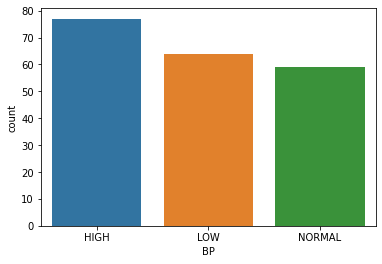

In [84]:
sns.countplot(df.BP)

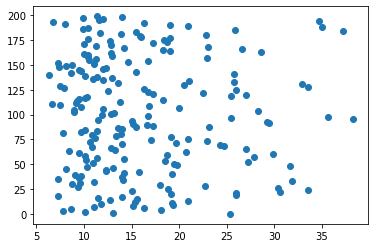

In [85]:
plt.scatter(df.Na_to_K,range(0,len(df.BP)))

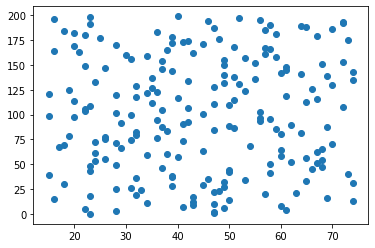

In [86]:
plt.scatter(df.Age,range(0,len(df.BP)))

BIVARIATE ANALYSIS

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


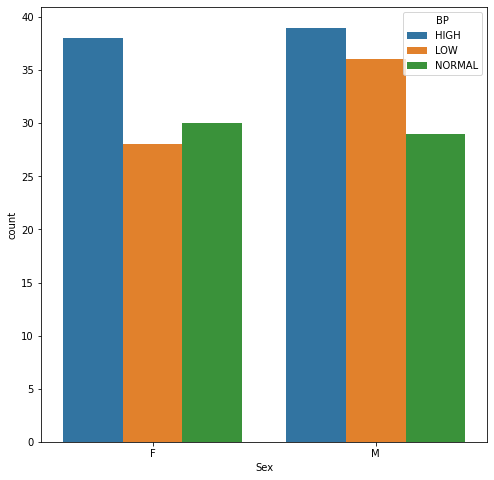

In [88]:
plt.figure(figsize=(8,8))
sns.countplot(df.Sex,hue='BP',data=df)

THERE IS NOT MUCH DIFFERENCE BETWEEN THE NUMBER OF MEN AND WOMEN WITH HIGH BP 

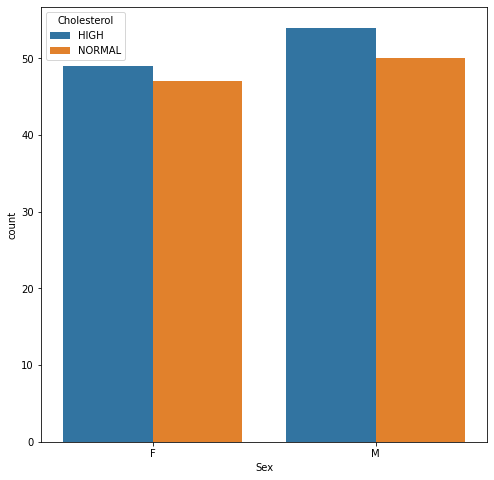

In [89]:
plt.figure(figsize=(8,8))
sns.countplot(df.Sex,hue='Cholesterol',data=df)

THE NUMBER OF MEN WTH HIGH CHOLESTEROL LEVEL IS GREATER THAN NUMBER OF WOMEN WITH HIGH CHOLESTEROL 

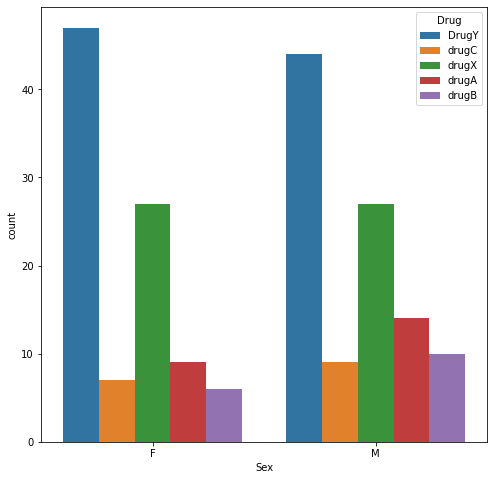

In [90]:
plt.figure(figsize=(8,8))
sns.countplot(df.Sex,hue='Drug',data=df)

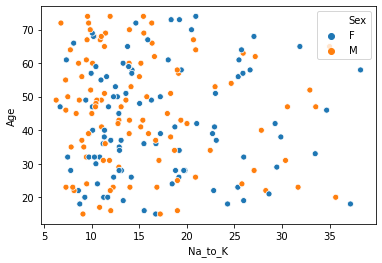

In [91]:
sns.scatterplot(df.Na_to_K,df.Age,hue='Sex',data=df)

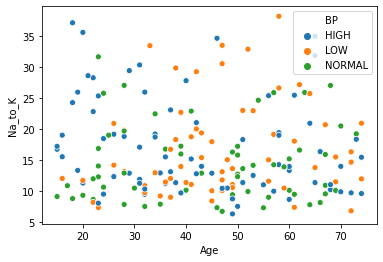

In [92]:
sns.scatterplot(df.Age,df.Na_to_K,hue='BP',data=df)

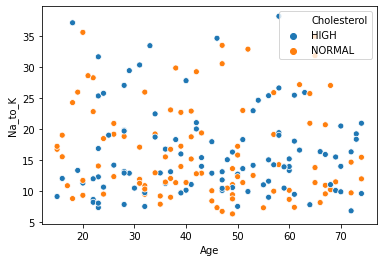

In [93]:
sns.scatterplot(df.Age,df.Na_to_K,hue='Cholesterol',data=df)

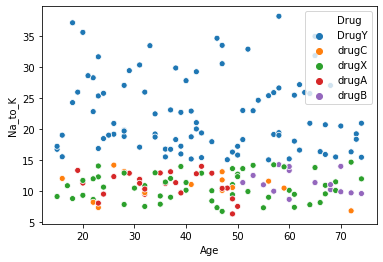

In [94]:
sns.scatterplot(df.Age,df.Na_to_K,hue='Drug',data=df)

CHECKING FOR OUTLIERS

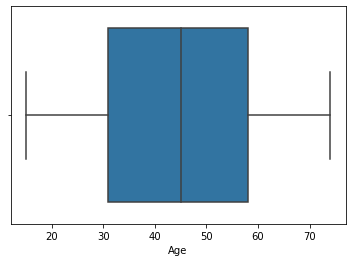

In [95]:
sns.boxplot(df.Age)

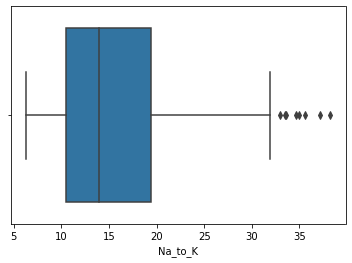

In [96]:
sns.boxplot(df.Na_to_K)

In [97]:
def outl(x):
    sns.boxplot(df[str(x)])
    iqr=df[str(x)].quantile(0.75)-df[str(x)].quantile(0.25)
    uiqr=df[str(x)].quantile(0.75) + (1.5*iqr)
    liqr=df[str(x)].quantile(0.25) - (1.5*iqr)
    return iqr,uiqr,liqr

(8.934499999999998, 32.781749999999995, -2.9562499999999954)

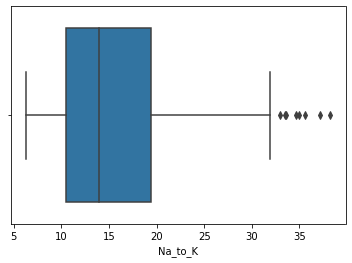

In [98]:
outl('Na_to_K')

In [99]:
a=df[df['Na_to_K'] > 32.7817].index

In [100]:
for i in range(0,len(a)):
    df.loc[a[i],['Na_to_K']] = 32.7817

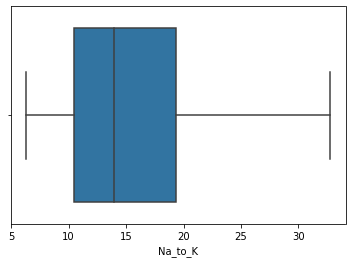

In [101]:
sns.boxplot(df.Na_to_K)

In [102]:
df=pd.get_dummies(df,drop_first=True)

In [103]:
df.columns

Index(['Age', 'Na_to_K', 'Sex_M', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_NORMAL',
       'Drug_drugA', 'Drug_drugB', 'Drug_drugC', 'Drug_drugX'],
      dtype='object')

In [104]:
x=df.iloc[:,0:6].values
y=df.iloc[:,6:9].values

In [105]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=0)

In [106]:
train_x.shape

(160, 6)

In [107]:
test_x.shape

(40, 6)

In [108]:
train_y.shape

(160, 3)

In [109]:
test_y.shape

(40, 3)

In [110]:
sc=StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

In [111]:
model=DecisionTreeClassifier()
model.fit(train_x,train_y)
pred_y1=model.predict(test_x)

In [112]:
model=RandomForestClassifier()
model.fit(train_x,train_y)
pred_y2=model.predict(test_x)

In [113]:
error = []
accuracy = []
# Calculating error for K values between 1 and 40
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    error.append(np.mean(pred_i != test_y))
    accuracy.append(accuracy_score(test_y, pred_i))

Text(0, 0.5, 'Mean Error')

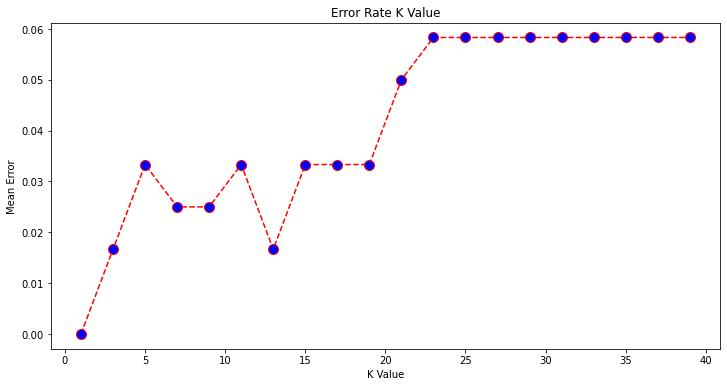

In [114]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,40,2), error, color='red', linestyle='dashed', marker=
'o',
markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [115]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_x,train_y)
pred_y3=model.predict(test_x)

In [116]:
accuracy_score(pred_y3,test_y)

0.95

In [117]:
accuracy_score(pred_y2,test_y)

0.975

In [118]:
accuracy_score(pred_y1,test_y)

0.975